# Introduction 

Food insecurity in America is rampant, with the USDA reporting that over 13.5% of American households faced food insecurity in 2023 (Link). A rampant increase from previous years. The effects of food insecurity are devastating. Feeding America, a non-profit organization combating food insecurity in America, reports that from households facing food insecurity, 66% had to choose between food and medical care, 57% had to choose between food and housing, and 31% had to choose between food and education (Link). These effects have also been shown to be dependent on the demographic of the population. This leads us to ask the questions 

* Who is affected by food insecurity? 
* Why is food insecure in an area?
* What is the correlation between food insecurity and data points? 


# The Data

I pulled the dataset "Food Access Research Atlas" from the USDA(U.S Department Of Agriculture). A dataset that includes 147 columns and 72530 rows. It tracts location data including census tract, state, and county. It has distance relative to low acess to food and population demographic data. 

###### 

# Pre-Processing Data

##### Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from qgridnext import show_grid

##### Importing our data set and creating a dataframe

In [19]:
uncleaned_atlas_df = pd.read_csv("/Users/anthonymanzo-trinidad/Documents/ITCS-3162_Project1/Food Access Research Atlas.csv")
variable = pd.read_csv("/Users/anthonymanzo-trinidad/Documents/ITCS-3162_Project1/VariableLookup.csv")

##### Checking for null values and data types

In [24]:
uncleaned_atlas_df.isnull().sum().sort_values(ascending=False)
uncleaned_atlas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


The most important features from our dataset are Censu Tract, State, Tract median family income, Tract poverty rate, Low income tract. As such we will drop any rows that do not have all of these features complete. 

In [ ]:
cleaned_atlas_df = uncleaned_atlas_df.dropna(subset=['CensusTract','State','County','Urban','LowIncomeTracts','MedianFamilyIncome','PovertyRate'])
cleaned_atlas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71783 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.1+ MB


We were able to drop around 1000 entries from our dataset. This is important because we will being using this cleaned dataset as the base for our further processed datasets to get greater insight on features that a greater amount of nulls.

After that we will focus on features

In [27]:
demo_atlas_df = cleaned_atlas_df.dropna(subset=['TractHispanic','TractAIAN','TractNHOPI','TractBlack','TractAsian','TractWhite'])
demo_atlas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71782 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.1+ MB


In [41]:
#checking my columns with the most null values 
uncleaned_atlas_df.isnull().sum().sort_values(ascending=False).head(110)

lanhopi20           71025
lalowi20            71025
lanhopi20share      71025
laaian20            71025
laaian20share       71025
                    ...  
laaianhalf           4568
lanhopihalfshare     4568
lanhopihalf          4568
lahunvhalfshare      4562
lasnaphalfshare      4562
Length: 110, dtype: int64

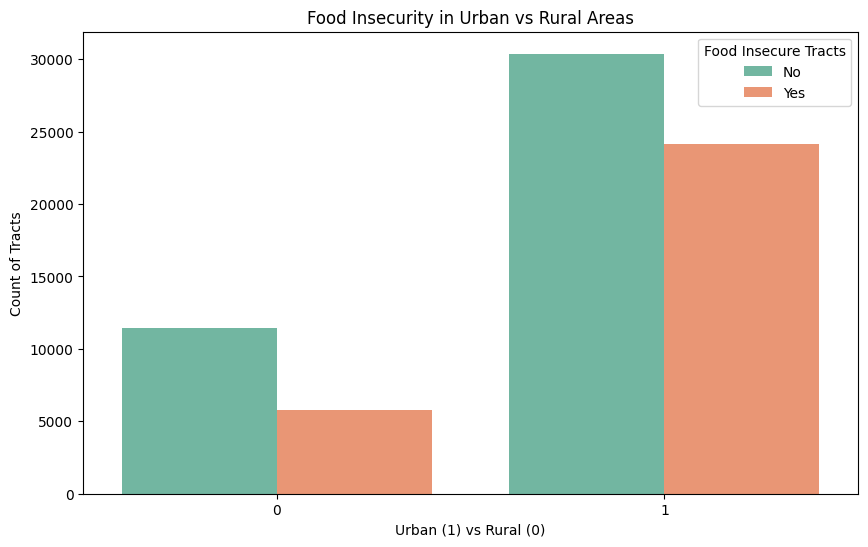

In [43]:
#Really easy graph showing proportion of food insecurity in urban vs rural areas
plt.figure(figsize=(10,6))
sns.countplot(data=cleaned_atlas_df, x='Urban', hue='LowIncomeTracts', palette='Set2')
plt.title('Food Insecurity in Urban vs Rural Areas')
plt.xlabel('Urban (1) vs Rural (0)')
plt.ylabel('Count of Tracts')
plt.legend(title='Food Insecure Tracts', labels=['No', 'Yes'])
plt.show()